In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import sys
import math
import unidecode

In [51]:
# importing CSV file
data=pd.read_csv("startup_funding .csv")

In [3]:
# displays the first five rows of the dataframe by default
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [4]:
# returns data type of each column
print(data.dtypes)

SNo                  int64
Date                object
StartupName         object
IndustryVertical    object
SubVertical         object
CityLocation        object
InvestorsName       object
InvestmentType      object
AmountInUSD         object
Remarks             object
dtype: object


In [5]:
# returns descriptive statistics summary of a given dataframe
data.describe()

,SNo
count,2372.000000
mean,1185.500000
std,684.881742
min,0.000000
25%,592.750000
50%,1185.500000
75%,1778.250000
max,2371.000000


In [6]:
# returns rows and columns
data.shape

(2372, 10)

In [7]:
# returns unique values of each column
data.nunique()

SNo                 2372
Date                 701
StartupName         2001
IndustryVertical     743
SubVertical         1364
CityLocation          71
InvestorsName       1885
InvestmentType         7
AmountInUSD          329
Remarks               69
dtype: int64

In [8]:
# returns sum of null values in each column 
data.isnull().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

In [9]:
# returns sum of null values in data frame 
data.isnull().sum().sum()

4095

In [10]:
# sorting the null values
missing_vals=data.isnull().sum().sort_values(ascending=False)
print(missing_vals)

Remarks             1953
SubVertical          936
AmountInUSD          847
CityLocation         179
IndustryVertical     171
InvestorsName          8
InvestmentType         1
SNo                    0
Date                   0
StartupName            0
dtype: int64


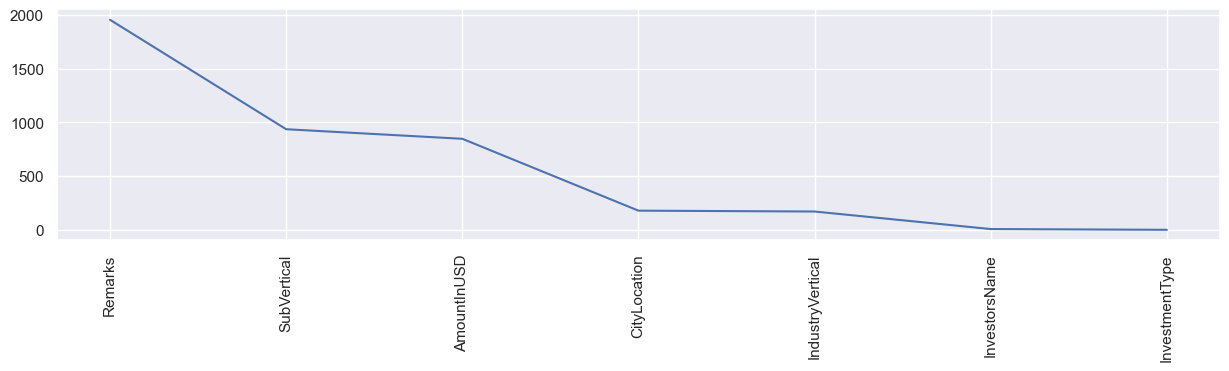

In [93]:
missing_vals[missing_vals!=0].plot(kind='line') #keeps the value only if it is true
plt.xticks(rotation=90);

In [ ]:
# drop remarks column
data = data.drop('Remarks', axis=1)

In [109]:
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD'],
      dtype='object')

In [12]:
# unique occurances of a value
Cities=data.CityLocation.value_counts() 
print(Cities)

Bangalore             627
Mumbai                446
New Delhi             381
Gurgaon               240
Pune                   84
                     ... 
Pune / Dubai            1
Varanasi                1
Mumbai / UK             1
Jodhpur                 1
Dallas / Hyderabad      1
Name: CityLocation, Length: 71, dtype: int64


<AxesSubplot:>

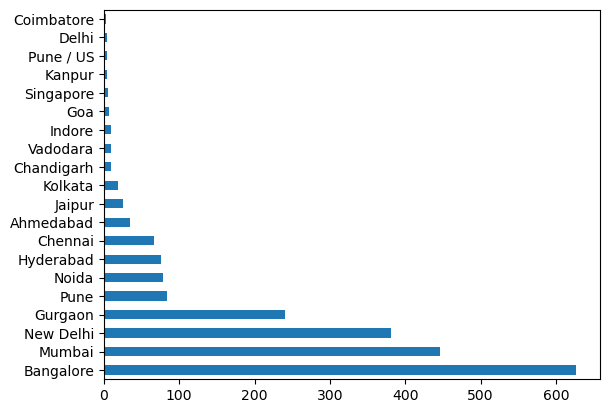

In [13]:
# displays top 20 cities with respect to its inverstments
Cities[:20].plot(kind='barh')

In [14]:
import seaborn as sb
sb.set_style("darkgrid")

/Users/sahasrakamatam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CityLocation', ylabel='Density'>

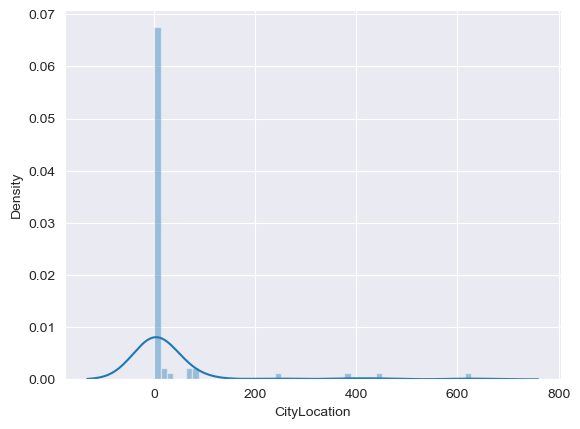

In [15]:
sb.distplot(Cities)
# most of the cities have very few startups

In [16]:
high_startups=Cities[Cities>10]

In [17]:
len(high_startups)
#only 11 cities have more than 10

11

In [18]:
percentage=len(high_startups)/len(Cities)
print(percentage)
#less than 15% of the cities have more than 10 start ups 

0.15492957746478872


/Users/sahasrakamatam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CityLocation', ylabel='Density'>

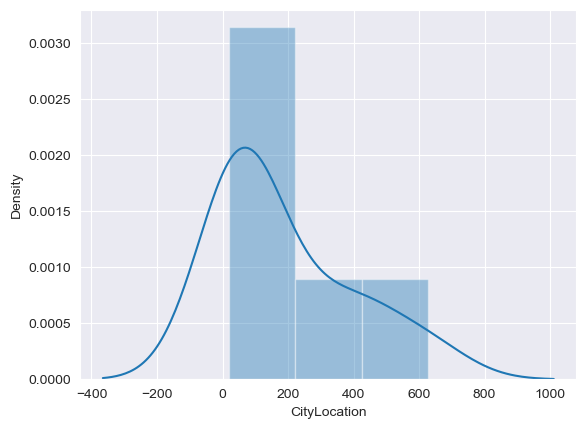

In [19]:
sb.distplot(high_startups)
# most of the cities have greater than 10 startups

In [21]:
low_startups=Cities[Cities<=10]
print(len(low_startups))

60


<AxesSubplot:xlabel='CityLocation', ylabel='Count'>

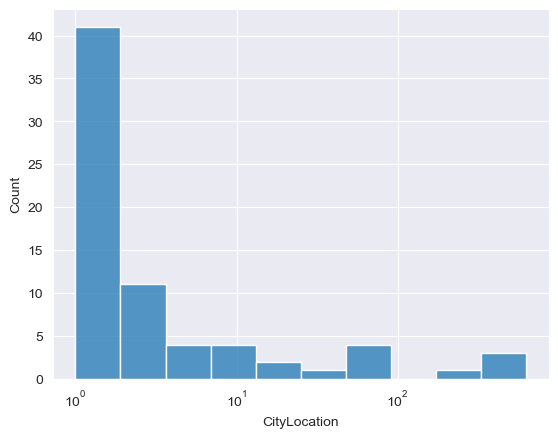

In [22]:
sb.histplot(Cities,log_scale=True)

In [23]:
print(Cities)

Bangalore             627
Mumbai                446
New Delhi             381
Gurgaon               240
Pune                   84
                     ... 
Pune / Dubai            1
Varanasi                1
Mumbai / UK             1
Jodhpur                 1
Dallas / Hyderabad      1
Name: CityLocation, Length: 71, dtype: int64


In [5]:
funds=data.AmountInUSD.value_counts() 
print(funds)

1,000,000      130
500,000         91
100,000         55
2,000,000       55
5,000,000       50
              ... 
15,600,000       1
62,000,000       1
175,000,000      1
675,000          1
3,250,000        1
Name: AmountInUSD, Length: 329, dtype: int64


<AxesSubplot:>

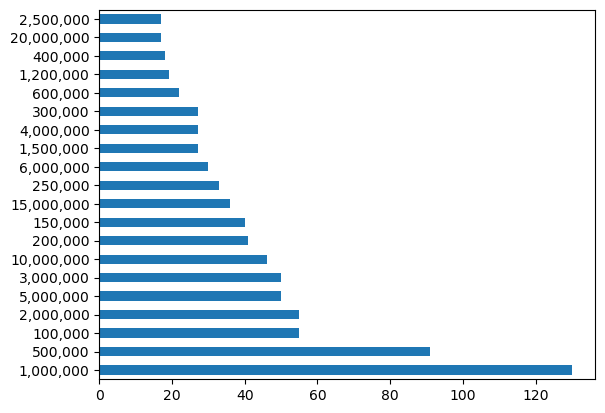

In [6]:
funds[:20].plot(kind='barh')

In [24]:
mode = data['AmountInUSD'].mode()[0]
print(mode)

12031073


In [25]:
sector = data['IndustryVertical'].value_counts().sort_values(ascending = False)

In [26]:
a = sector.head(10)

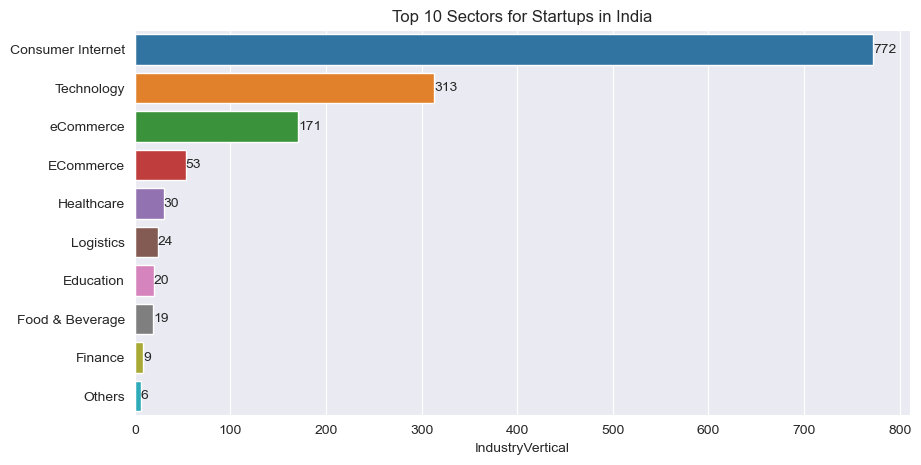

In [28]:
plt.figure(figsize = (10,5))
ax = sb.barplot(x = a, y = a.index)
ax.bar_label(ax.containers[0])

plt.title('Top 10 Sectors for Startups in India')
plt.show()

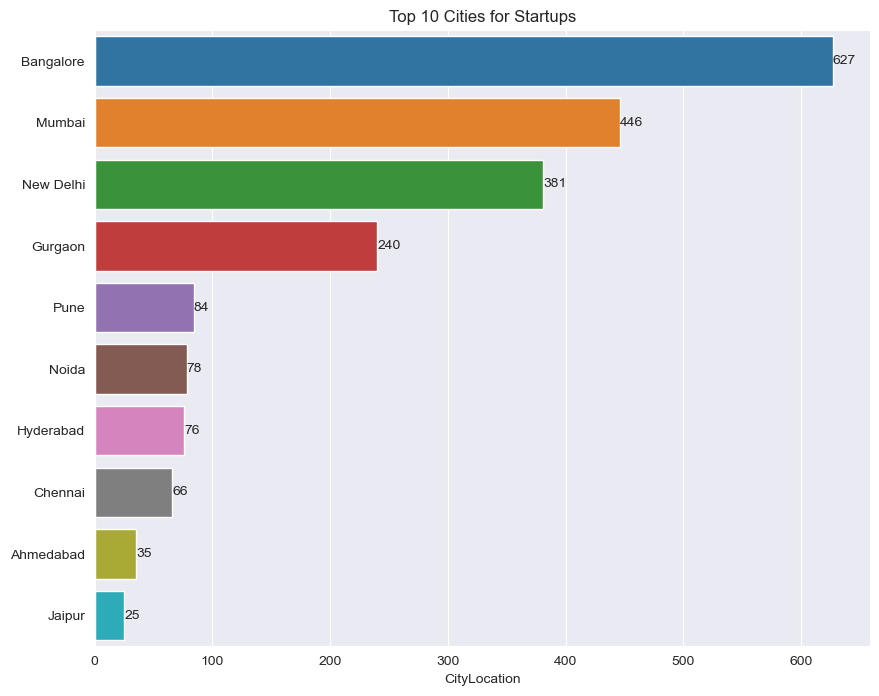

In [29]:
ct = data['CityLocation'].value_counts().sort_values(ascending = False)
a = ct.head(10)

plt.figure(figsize = (10,8))
ax = sb.barplot(x = a, y = a.index)
ax.bar_label(ax.containers[0])

plt.title('Top 10 Cities for Startups')
plt.show()

In [78]:
# returns investment types in descending order
start_INtype=data["InvestmentType"].value_counts()[0:].reset_index()

In [79]:
start_INtype

,index,InvestmentType
0,Seed Funding,1271
1,Private Equity,1066
2,SeedFunding,30
3,Debt Funding,1
4,PrivateEquity,1
5,Crowd funding,1
6,Crowd Funding,1


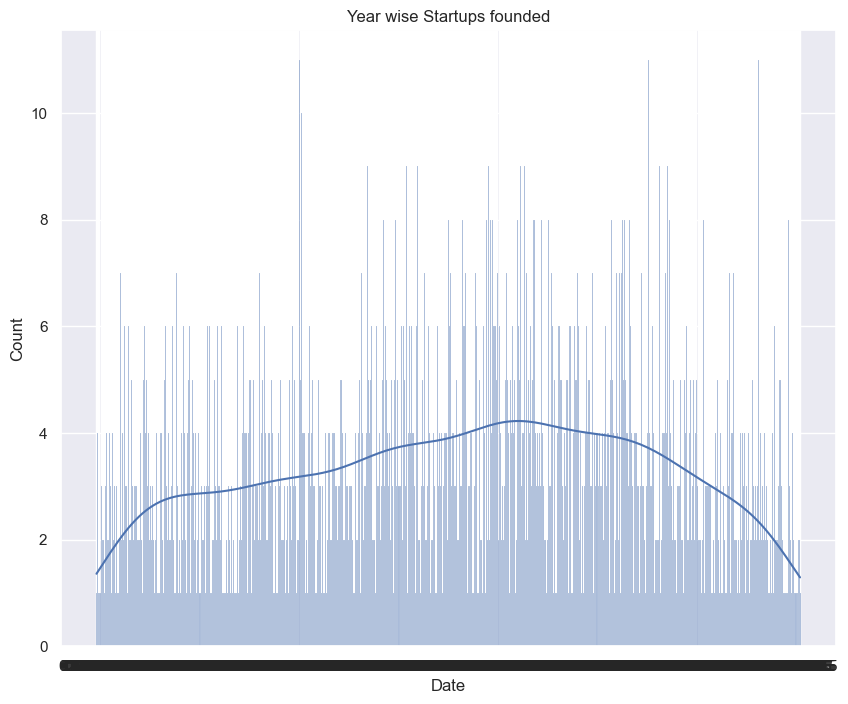

In [92]:
plt.figure(figsize = (10,8))
sb.histplot(data['Date'], kde = True)
plt.title('Year wise Startups founded')
plt.show()

In [53]:
# top 10 investors
i=data['InvestorsName'].value_counts().head(10).reset_index()
i.columns=["InvestorsName", "Number"]

i.drop(0,axis=0,inplace=True)
label10=np.arange(0,10)
# creating scatter plot
fig=go.Figure(data=[go.Scatter(x=i.InvestorsName,y=i.Number,mode='markers',marker_size=(i.Number)*3,  marker={'color':label10})])
fig.update_layout(autosize=True ,plot_bgcolor='rgb(275, 275, 275)')
fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color = "black"
fig.show()

In [54]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


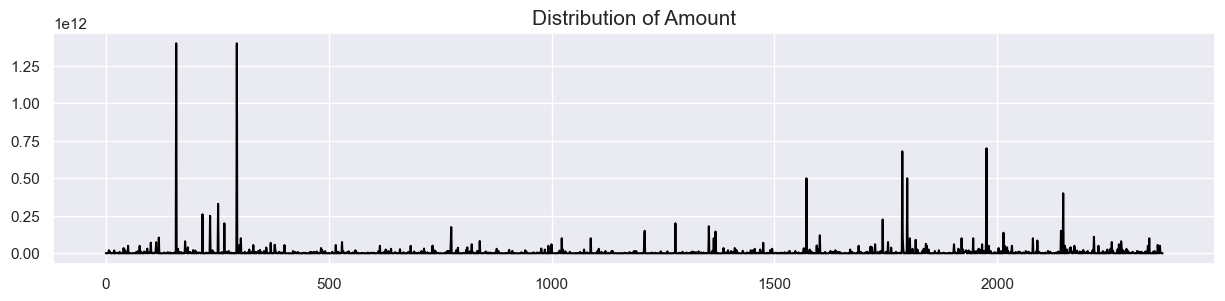

In [90]:
# convert the amount column into numerical, so that we can analyze the values inside it

# function to clean the AmounInUsd Column
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
    x = str(x).replace(",","").replace("")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == '':
        x = '-999'
    return x

# apply the function on the column
data["AmountInUSD"] = data["AmountInUSD"].apply(lambda x: float(clean_amount(x)))

# check the head of the column after cleaning it
plt.rcParams['figure.figsize'] = (15, 3)
data['AmountInUSD'].plot(kind = 'line', color = 'black')
plt.title('Distribution of Amount', fontsize = 15)
plt.show()

In [16]:
data['AmountInUSD'] = data['AmountInUSD'].str.replace(',', '')

In [17]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000,NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000,NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000,NaN


In [18]:
data['AmountInUSD'] = data['AmountInUSD'].astype(float)

In [19]:
data['AmountInUSD'].mean()

12031073.099016393

In [20]:
data.fillna(data['AmountInUSD'].mean(), inplace=True)

In [21]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1.300000e+06,12031073.099016
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,1.203107e+07,12031073.099016
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,1.203107e+07,12031073.099016
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,5.000000e+05,12031073.099016
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,8.500000e+05,12031073.099016


In [22]:
data['AmountInUSD'] = data['AmountInUSD'].astype(int)

In [23]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000,12031073.099016
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,12031073,12031073.099016
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,12031073,12031073.099016
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000,12031073.099016
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000,12031073.099016


<AxesSubplot:xlabel='AmountInUSD', ylabel='StartupName'>

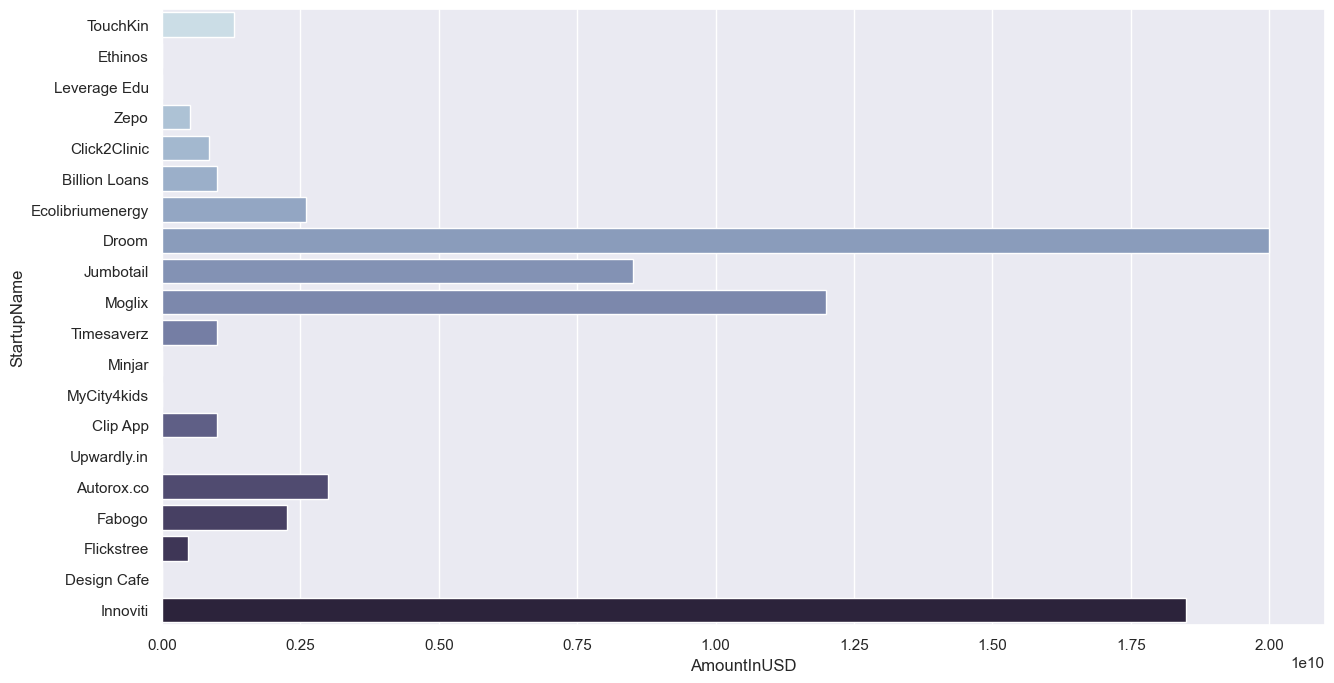

In [104]:
# top 20 startups and their investment amount
start_topfun=data[0:20]
plt.figure(figsize=(15,8))
sb.set(style="darkgrid")
sb.barplot(data=start_topfun,y="StartupName",x="AmountInUSD",palette="ch:s=.25,rot=-.25")

In [49]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# visual representation of text data

In [50]:
# add each subvertical information into a list
text=[]
for i in range (0, len(data["SubVertical"])):
  if type(data["SubVertical"][i])==str:
    text.append(data["SubVertical"][i])
   
text=" ".join(text) 
text = text.split(" ")

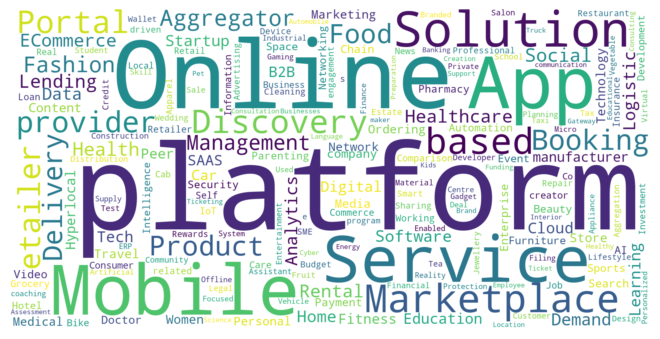

In [51]:
wordcloud = WordCloud( max_words=200, background_color="white",collocations=False, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [15]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
